In [1]:
#Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist

In [2]:
# Settings
sns.set()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)
pd.options.display.float_format= '{:.2f}'.format

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import CSV

df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,female,2007


In [3]:
#Variables

Title_fontsize= 16

# Data Validation

1) ¿Qué tipo de dato son las variables del conjunto de datos?

2) ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

3) ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

4) ¿Cuál es el ratio de valoes en 0?

5) ¿Cuál es el ratio de valoes únicos?

### Tratamineto de valores nulos
6) ¿Existen valores nulos explícitos en el conjunto de datos?

7) De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?
8) ¿Cuántos valores nulos tenemos en total en el conjunto de datos?
9) ¿Cuál es la proporción de valores nulos por cada variable?
10) ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?
11) ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [5]:
# 1
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [6]:
# 2
(df
 .dtypes
 .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

In [7]:
# 3
print('the dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

the dataset has 344 rows and 8 columns


In [8]:
# 4

def Zerovalues(df):
    d = {'TotalRecord': df.shape[0], '#Zeros':0, '%Zeros':0}
    y = pd.DataFrame(d, index= df.columns)
     
    for c  in df.columns:
         y.loc[c,"#Zeros"] = len(df[df[c]==0])
         y.loc[c,"%Zeros"] = round((y.loc[c,"#Zeros"] / y.loc[c,"TotalRecord"] ),2) * 100
    return y[y["#Zeros"]>0]

In [9]:
#4
Zerovalues(df)

,TotalRecord,#Zeros,%Zeros


In [10]:
print("Conclusion -> There aren't ")

Conclusion -> There aren't 


In [11]:
# 5

def uniqueRate(data,initialColumn):
    
  d = pd.DataFrame(columns=("UniqueValue","UniqueRate"),index=data.columns)
  x = data.columns

  for i in data.columns:
    d.loc[i,"UniqueValue"]=data[i].nunique()
    #print(x[i])

  d["UniqueRate"]= d["UniqueValue"] / data.shape[0]
  d["UniqueRate"] = d["UniqueRate"].astype(float)
  d["UniqueRate"] = round(d["UniqueRate"],3)
  return d.sort_values(by="UniqueValue",ascending=False)

In [12]:
uniqueRate(df,0)

,UniqueValue,UniqueRate
bill_length_mm,164,0.48
body_mass_g,94,0.27
bill_depth_mm,80,0.23
flipper_length_mm,55,0.16
species,3,0.01
island,3,0.01
year,3,0.01
sex,2,0.01


In [13]:
# 6 & 7
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [14]:
def nullValues(dataSet):
    ''' Analize null values '''
    x = dataSet.isna().sum()
    if len(x[x>0])>0:
        d = {'NullRecord': x[x>0], 'TotalRecord': dataSet.shape[0]}
        y = pd.DataFrame(d)
        #y["CompleteRecord"] = y["TotalRecord"] - y["NullRecord"]
        y["Empty %"] = round(y['NullRecord']/y['TotalRecord'],2) 
    return y.sort_values("NullRecord",ascending=True)

In [15]:
nullValues(df)

,NullRecord,TotalRecord,Empty %
bill_length_mm,2,344,0.01
bill_depth_mm,2,344,0.01
flipper_length_mm,2,344,0.01
body_mass_g,2,344,0.01
sex,11,344,0.03


In [16]:
# 8
print('Null Values -> {}'.format(df.isnull().sum().sum()))

Null Values -> 19


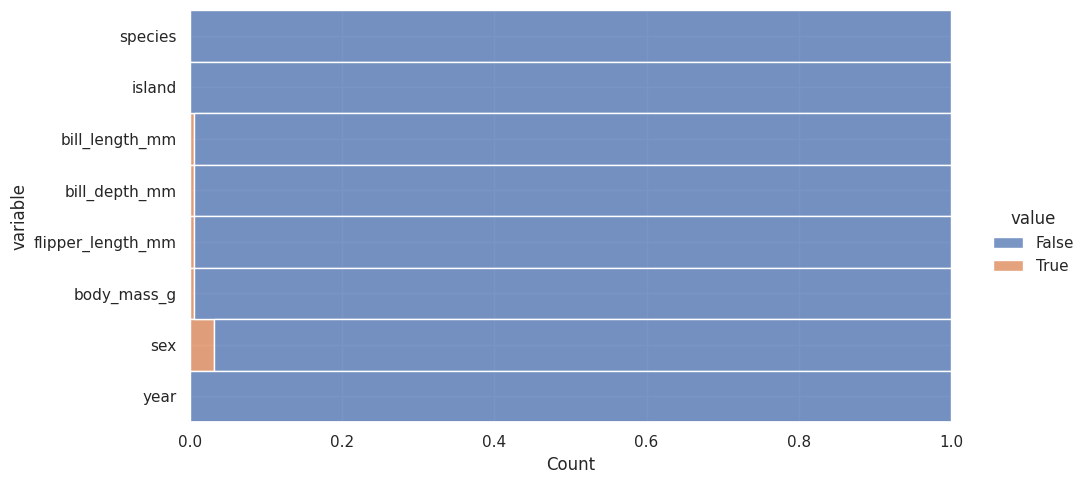

In [17]:
# 9 & 10
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df_null:(sns.displot(
                   data=df_null,
                   y='variable',
                   hue='value',
                   multiple='fill',
                   aspect=2)
                        )
    )
)
plt.show()

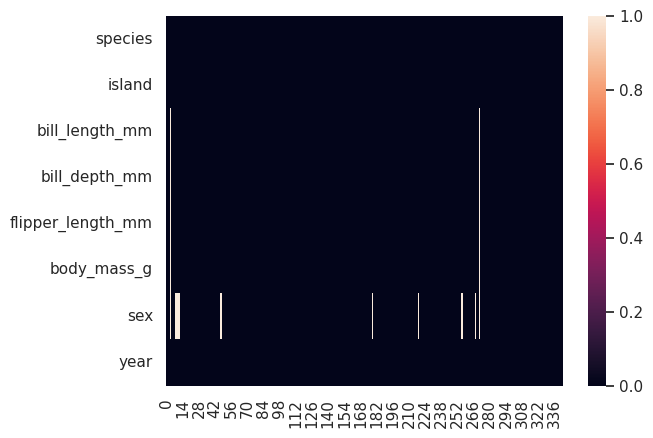

In [18]:
# 10
(   
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df_null:(
            sns.heatmap(
                data=df_null
            )
        )

    )
)
plt.show()

In [19]:
# 12
print('Number of rows removing null records-> {}'.format(df.shape[0]-df.dropna().shape[0]))

Number of rows removing null records-> 11


# Concusion
#### The number of null values wasn't significant so we decided to eliminate them.

In [20]:
sex=df['sex'].value_counts()
shape=df.shape

print(' Total Male -> {} \n Total Female -> {} \n Total "nan" -> {}'.format(sex[0],sex[1],shape[0]-sex[0]-sex[1]))
df=df.dropna()

 Total Male -> 168 
 Total Female -> 165 
 Total "nan" -> 11


## Change variable type

In [21]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [22]:
df = (
    df.astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
)

In [23]:
df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [24]:
df.describe(include='category').transpose()

,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,male,168


In [25]:
df.describe(include=np.number).transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.00,43.99,5.47,32.10,39.50,44.50,48.60,59.60
bill_depth_mm,333.00,17.16,1.97,13.10,15.60,17.30,18.70,21.50
flipper_length_mm,333.00,200.97,14.02,172.00,190.00,197.00,213.00,231.00
body_mass_g,333.00,4207.06,805.22,2700.00,3550.00,4050.00,4775.00,6300.00
year,333.00,2008.04,0.81,2007.00,2007.00,2008.00,2009.00,2009.00


## Categorical variables - Analysis

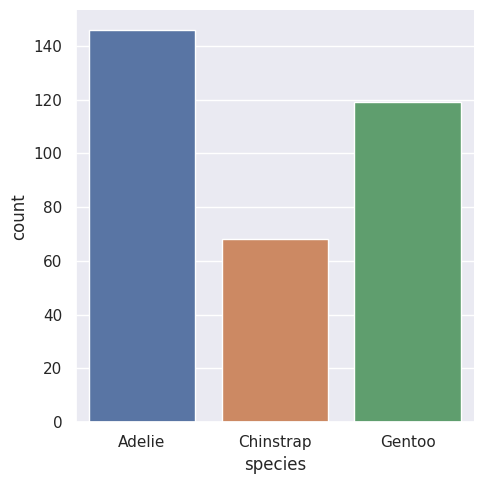

In [26]:
sns.catplot(data=df,
            x='species',
            kind='count'
            )
plt.show()

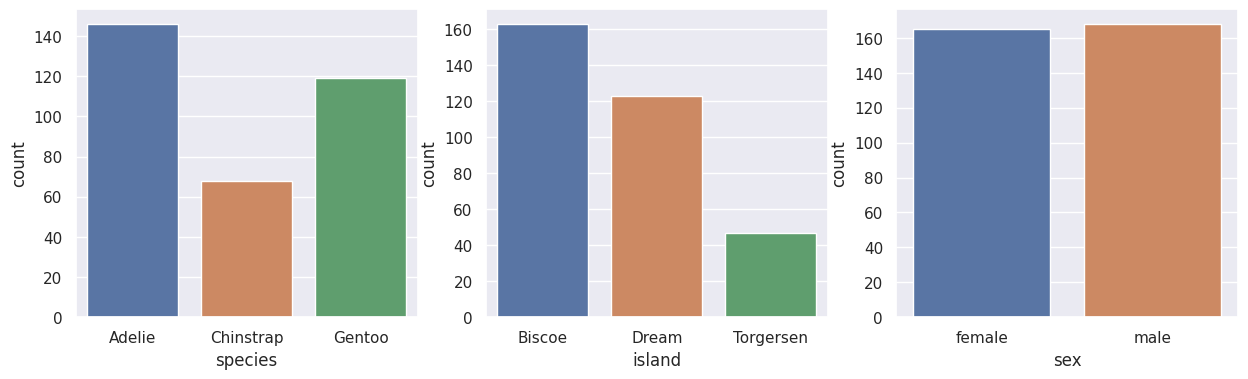

In [27]:
categories=df.select_dtypes('category').columns
fig, ax = plt.subplots(1,3,figsize=(15,4))
for i in range(len(categories)):
    (
        df
        .value_counts(categories[i],sort=True)
        .reset_index(name='count')
        .pipe(
            lambda df_count:(
                sns.barplot(
                    ax=ax[i],
                    data=df_count,
                    x = categories[i],
                    y='count'
                )
            )
                
        )
    )

In [28]:
df_categories=df.select_dtypes('category')
categories=df.select_dtypes('category').columns

In [29]:
def pivot_table(data,columns,count):

    for i in columns:
        d = data.pivot_table(index= i, values=count, margins=True,margins_name='Total',aggfunc='count')
        d['%']=d/data.shape[0]
        d['%']=round(d['%'].astype(float),2)
        print(i)
        print('')
        print(d.sort_values(by=count,ascending=True))
        print('\n')

In [30]:
pivot_table(df,categories,'year')

species

           year    %
species             
Chinstrap    68 0.20
Gentoo      119 0.36
Adelie      146 0.44
Total       333 1.00


island

           year    %
island              
Torgersen    47 0.14
Dream       123 0.37
Biscoe      163 0.49
Total       333 1.00


sex

        year    %
sex              
female   165 0.50
male     168 0.50
Total    333 1.00




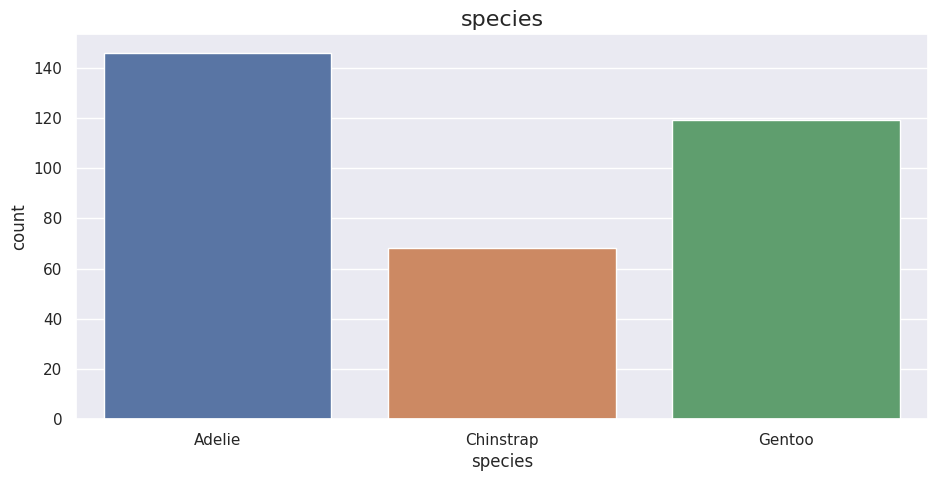

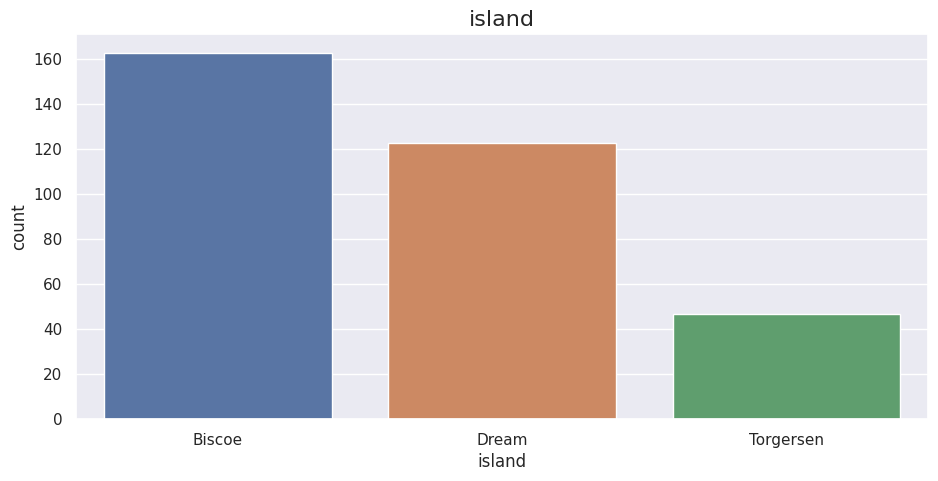

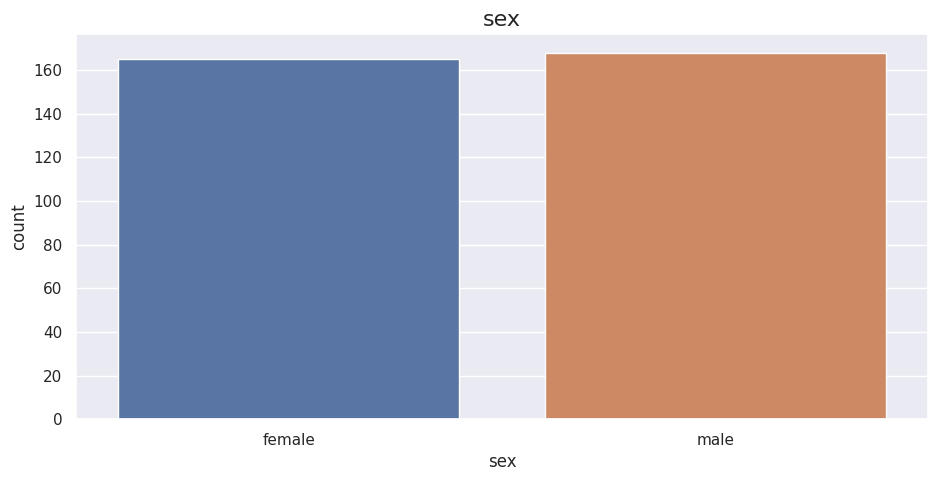

In [31]:
for i in df_categories:
    plt.figure(figsize=(11,5))
    plt.title(i,fontsize=Title_fontsize)
    plt.rcParams['figure.facecolor'] = 'White'
    sns.countplot(x=df_categories[i])
    plt.show()

## Measures of central tendency

In [32]:
print('Mean\n')
print(df.mean())
print('\n')
print('Median\n')
print(df.median())
print('\n')
print('Mode\n')
print(df_categories.mode())

Mean

bill_length_mm        43.99
bill_depth_mm         17.16
flipper_length_mm    200.97
body_mass_g         4207.06
year                2008.04
dtype: float64


Median

bill_length_mm        44.50
bill_depth_mm         17.30
flipper_length_mm    197.00
body_mass_g         4050.00
year                2008.00
dtype: float64


Mode

  species  island   sex
0  Adelie  Biscoe  male


In [33]:
df.describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


# measures of dispersion

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.00,43.99,5.47,32.10,39.50,44.50,48.60,59.60
bill_depth_mm,333.00,17.16,1.97,13.10,15.60,17.30,18.70,21.50
flipper_length_mm,333.00,200.97,14.02,172.00,190.00,197.00,213.00,231.00
body_mass_g,333.00,4207.06,805.22,2700.00,3550.00,4050.00,4775.00,6300.00
year,333.00,2008.04,0.81,2007.00,2007.00,2008.00,2009.00,2009.00


In [35]:
df_desc=df.describe().transpose()
df_desc['inter_range'] = df_desc['75%'] - df_desc['25%']
df_desc['range+'] = df_desc['mean'] + df_desc['std']
df_desc['range-'] = df_desc['mean'] - df_desc['std']
df_desc

,count,mean,std,min,25%,50%,75%,max,inter_range,range+,range-
bill_length_mm,333.00,43.99,5.47,32.10,39.50,44.50,48.60,59.60,9.10,49.46,38.52
bill_depth_mm,333.00,17.16,1.97,13.10,15.60,17.30,18.70,21.50,3.10,19.13,15.20
flipper_length_mm,333.00,200.97,14.02,172.00,190.00,197.00,213.00,231.00,23.00,214.98,186.95
body_mass_g,333.00,4207.06,805.22,2700.00,3550.00,4050.00,4775.00,6300.00,1225.00,5012.27,3401.84
year,333.00,2008.04,0.81,2007.00,2007.00,2008.00,2009.00,2009.00,2.00,2008.85,2007.23


In [36]:
numeric_columns = df.select_dtypes(include=np.number).columns[:4]
numeric_columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

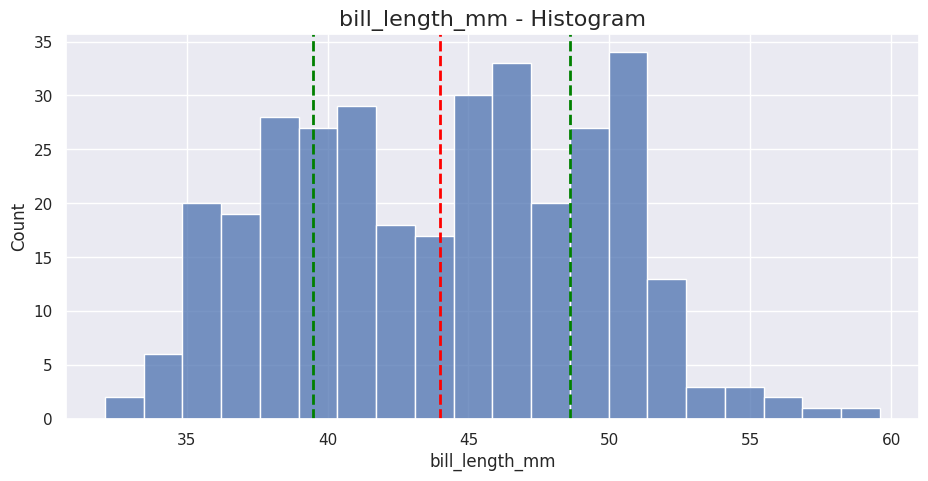

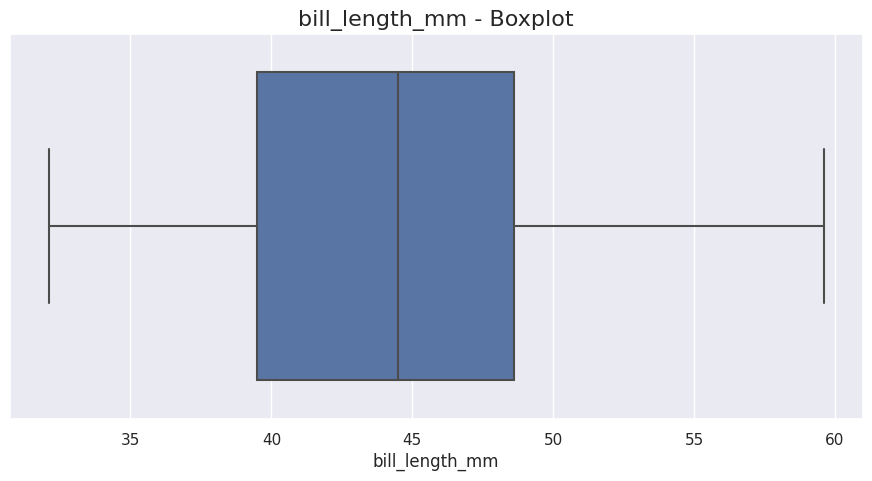

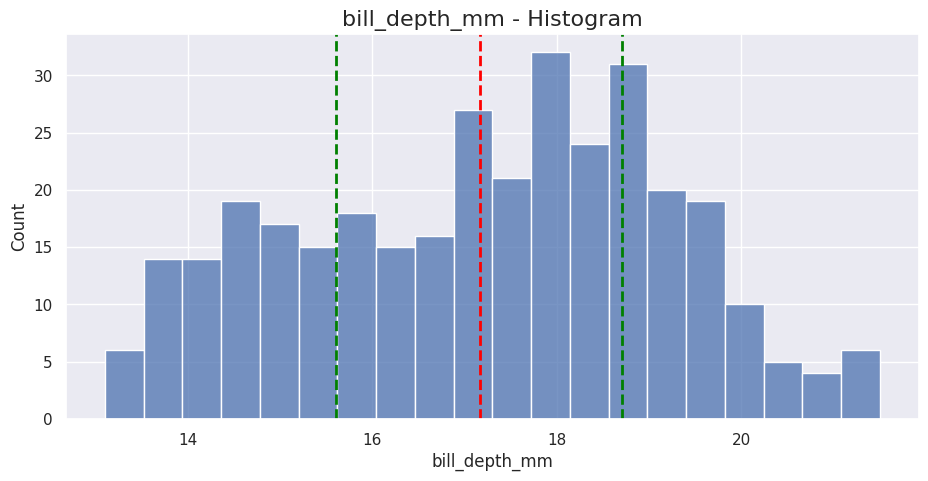

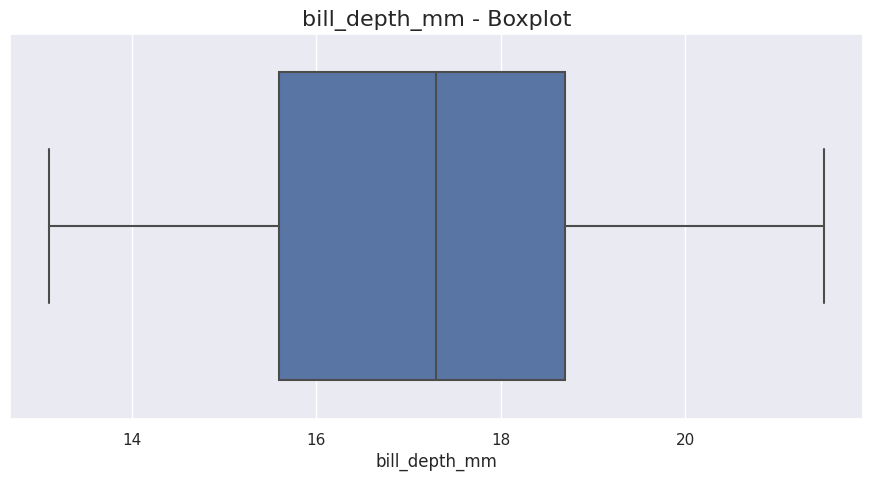

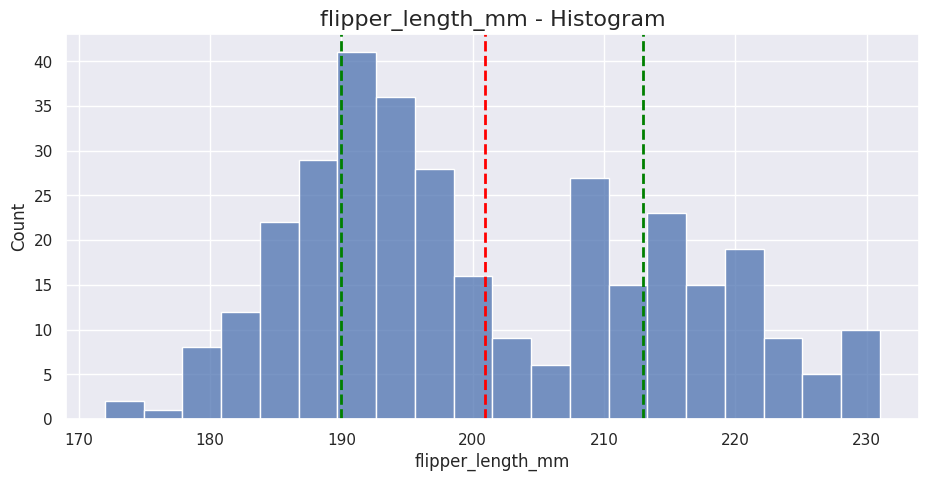

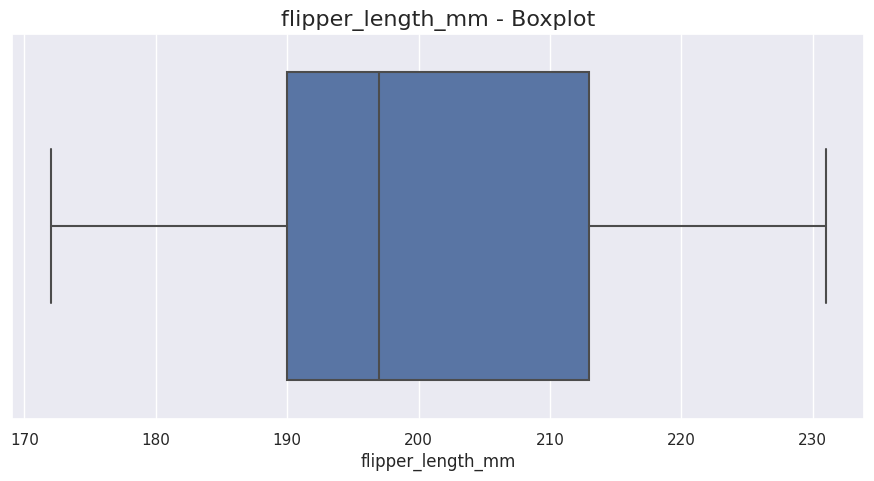

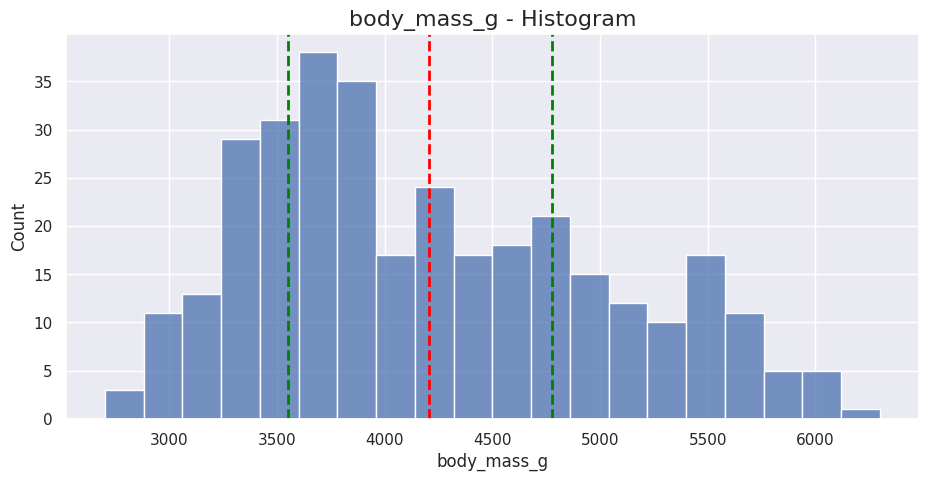

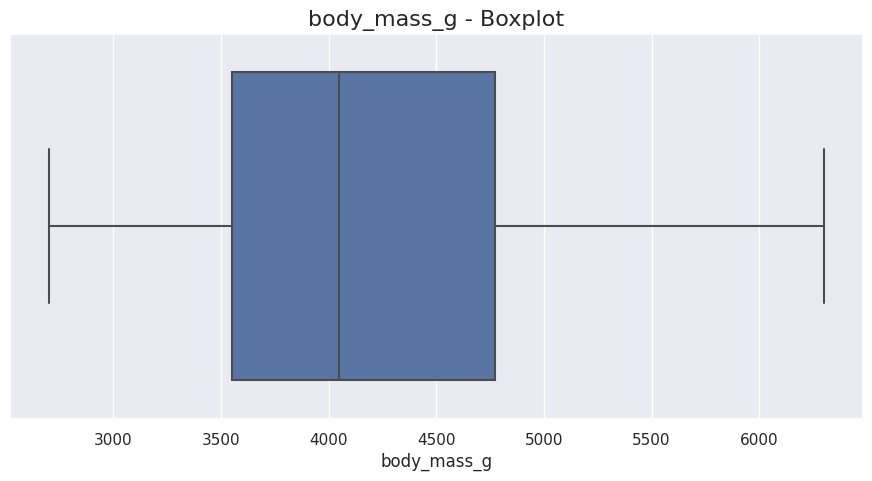

In [37]:
for column in numeric_columns:
    plt.figure(figsize=(11,5))
    sns.histplot(
        data=df,
        x=column,
        bins=20
    )
    plt.axvline(
        x=df[column].mean(),
        color='red',
        linestyle='--',
        linewidth=2)
    plt.axvline(
    x= df[column].quantile(q=0.25),
        color='green',
        linestyle='--',
        linewidth=2
    )
    plt.axvline(
    x= df[column].quantile(q=0.75),
        color='green',
        linestyle='--',
        linewidth=2
    )
    plt.title(column+' - Histogram',fontsize=16)
    plt.show()
    plt.figure(figsize=(11,5))
    sns.boxplot(data=df
                ,x=column)
    plt.title(column+' - Boxplot',fontsize=Title_fontsize)
    plt.show()

In [38]:
species = df.species.unique()

adelie_df = df.query("species == 'Adelie'")
gentoo_df = df.query("species == 'Gentoo'")
chinstrap_df = df.query("species == 'Chinstrap'")

list = [adelie_df,gentoo_df,chinstrap_df]

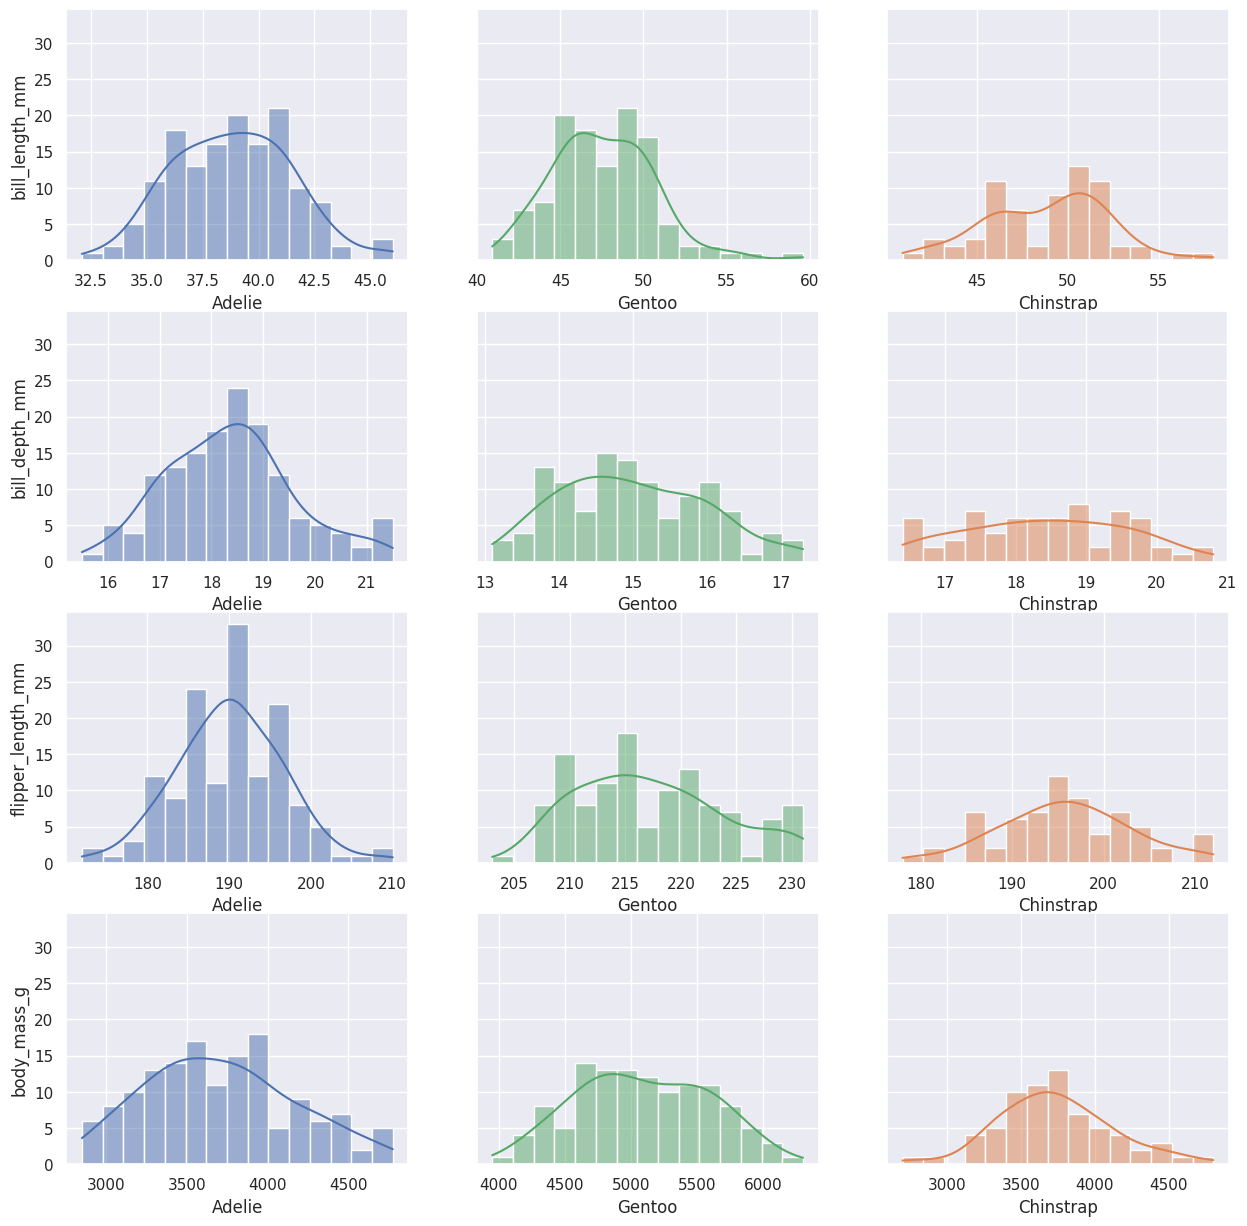

In [39]:
fig,ax = plt.subplots(len(numeric_columns),len(list),sharey=True, figsize=(15,15))

for j in range(len(numeric_columns)):
    for i in range(len(list)):
        sns.histplot( 
            ax=ax[j][i],
            data=list[i],
            x=numeric_columns[j],
            multiple='stack',
            hue='species',
            bins=15,
            kde=True,
            )
        

        ax[j][i].set_ylabel(f'{numeric_columns[j]}')
        ax[j][i].set_xlabel(f'{species[i]}')

        ax[j][i].get_legend().remove()

# Mass Probability Functions

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

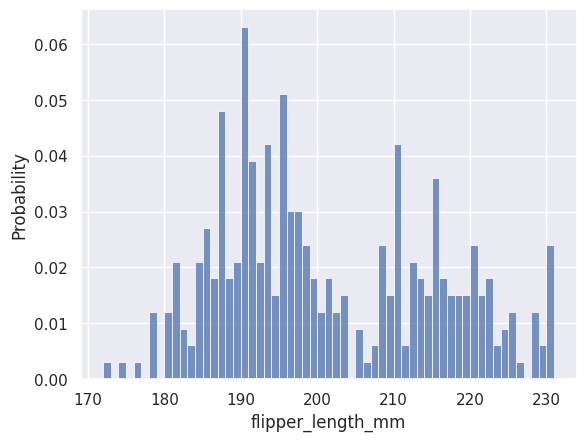

In [40]:
sns.histplot(
    data=df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

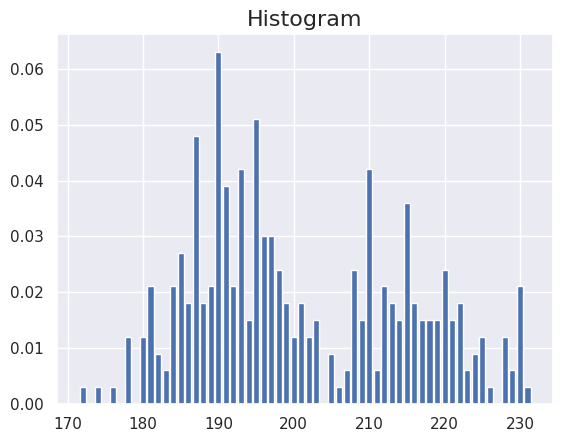

In [43]:
pmf_flipper_lenght.bar()
plt.title('Histogram',fontsize=Title_fontsize)
plt.show()

In [44]:
print('La probabilidad encontrar un flipper lenght de 200mm en un pringuino es de {}%'.format(round(pmf_flipper_lenght(200)*100,3)))

La probabilidad encontrar un flipper lenght de 200mm en un pringuino es de 1.201%


# Empirical cumulative probability functions

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

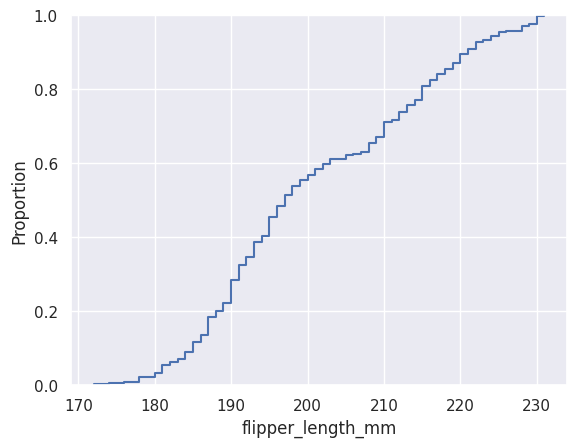

In [45]:
sns.ecdfplot(
    data=df,
    x='flipper_length_mm'
)

In [46]:
cmd_flipper_length=empiricaldist.Cdf.from_seq(
    df.flipper_length_mm,
    normalize=True
)

Text(0.5, 1.0, 'Cummulative function')

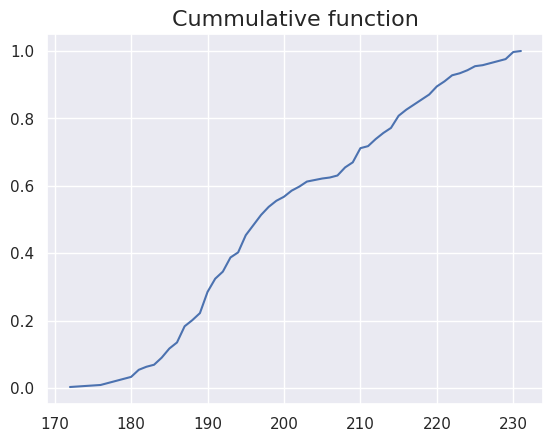

In [47]:
cmd_flipper_length.plot()
plt.title('Cummulative function',fontsize=Title_fontsize)

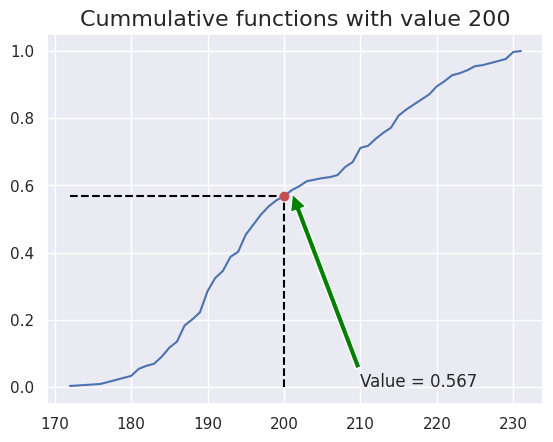

In [48]:
cmd_flipper_length.plot()

q = 200
p = cmd_flipper_length.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)
plt.hlines(
    y=p,
    xmin=cmd_flipper_length.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)
plt.annotate(f'Value = {str(p)[:5]}', xy =(201,0.58),
                xytext =(210, 0.0), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.01))

plt.plot(q,p, 'ro')
plt.title('Cummulative functions with value '+str(q),fontsize=Title_fontsize)
plt.show()

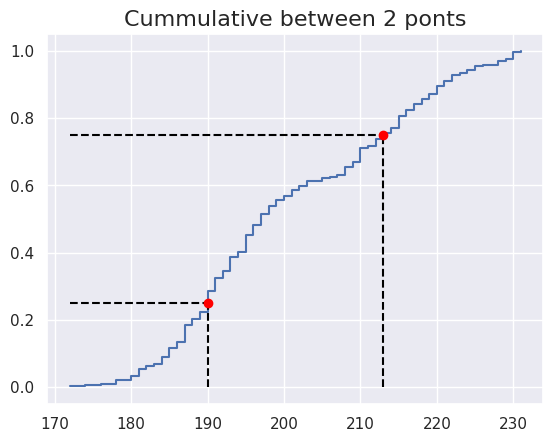

In [49]:
cmd_flipper_length.step()

p_1 = 0.25 # Specify probability
P_2 = 0.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cmd_flipper_length.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=cmd_flipper_length.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)
plt.title('Cummulative between 2 ponts',fontsize=Title_fontsize)
plt.show()

# Probability density functions

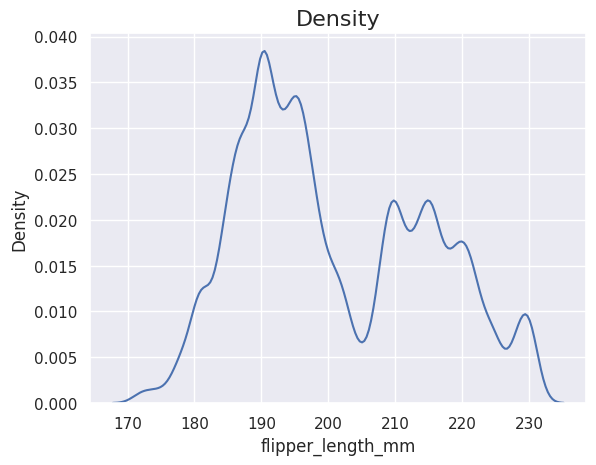

In [56]:
sns.kdeplot(
    data=df,
    x='flipper_length_mm',
    bw_method=0.1
)
plt.title('Density',fontsize=Title_fontsize)
plt.show()

In [58]:
stats = df.body_mass_g.describe()
stats

count    333.00
mean    4207.06
std      805.22
min     2700.00
25%     3550.00
50%     4050.00
75%     4775.00
max     6300.00
Name: body_mass_g, dtype: float64

In [60]:
import scipy

bill_length_mm


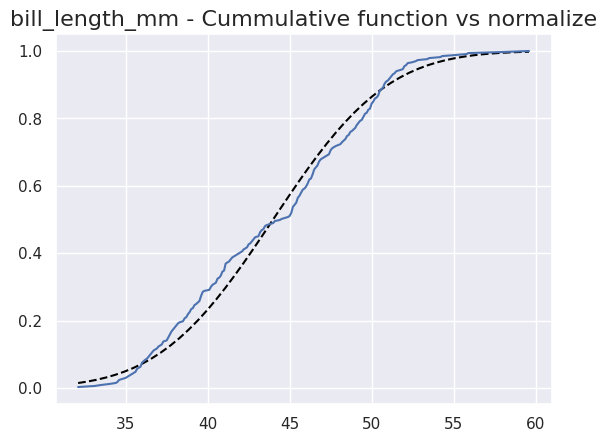

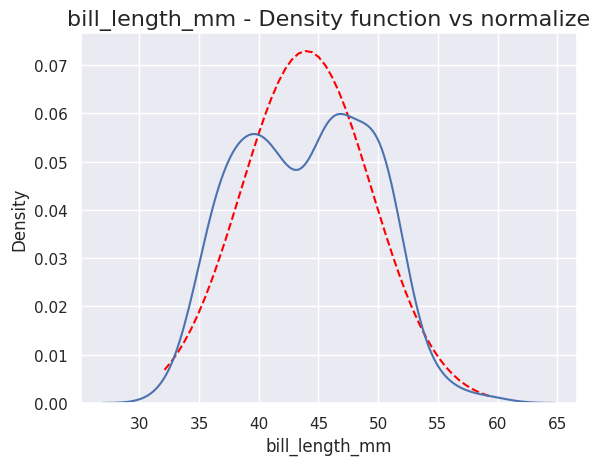

bill_depth_mm


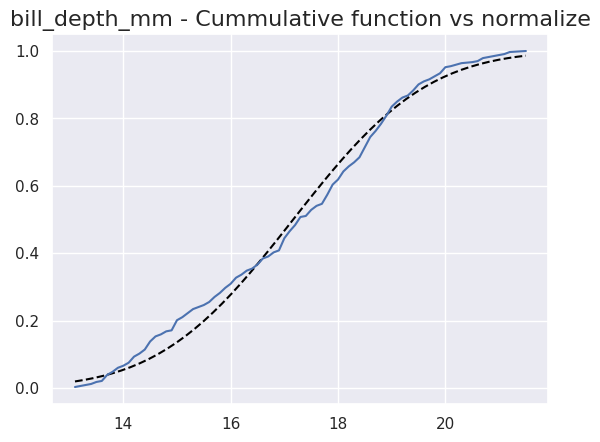

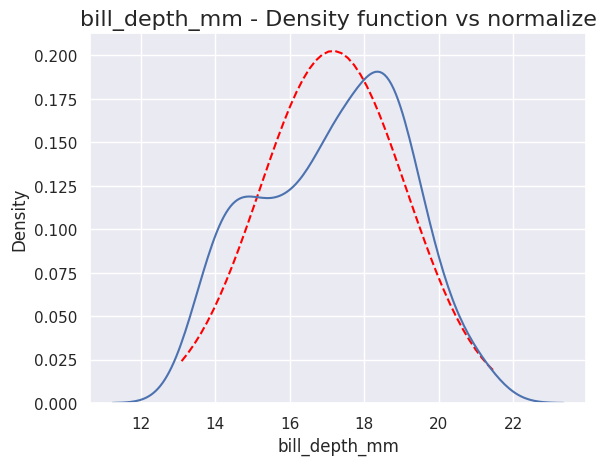

flipper_length_mm


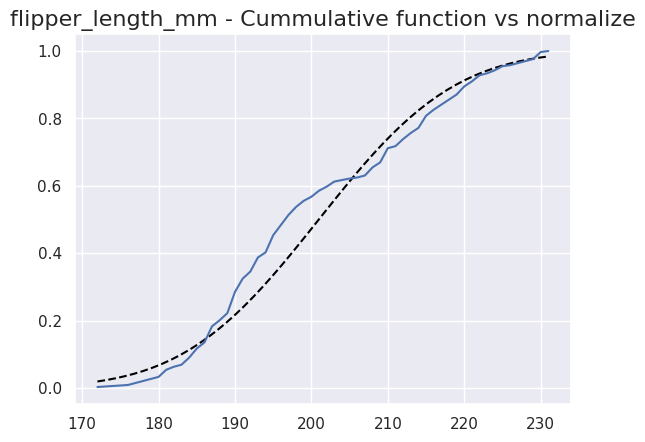

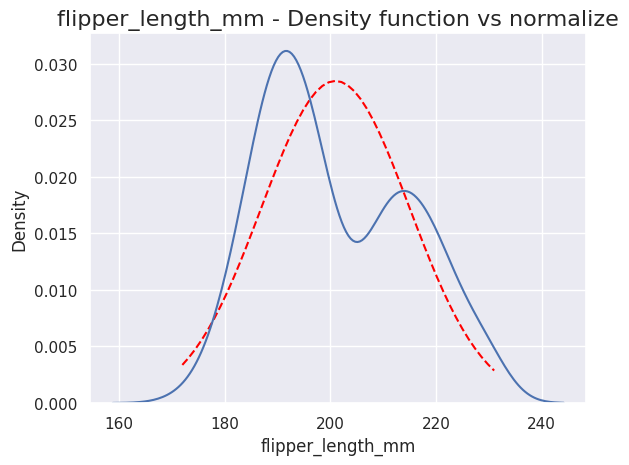

body_mass_g


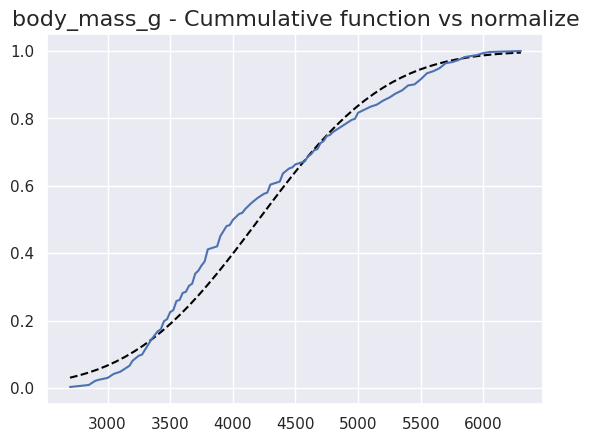

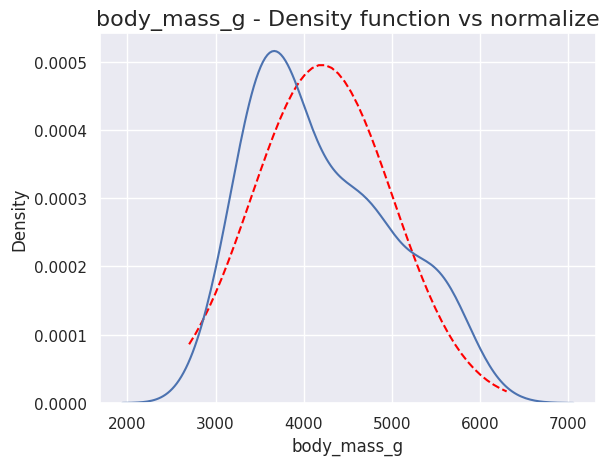

In [94]:
for column in numeric_columns:
    stats = df[column].describe()
    xs = np.linspace(stats['min'],stats['max'])
    ys= scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)
    zs= scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)
    
    
    plt.plot(xs,ys,color='black',linestyle='dashed')
    empiricaldist.Cdf.from_seq(
        df[column],
        normalize=True
    ).plot()
    plt.title(f'{column} - Cummulative function vs normalize',fontsize=Title_fontsize)
    plt.show()
    
    plt.plot(xs,zs,color='red',linestyle='dashed')

    sns.kdeplot(
        data=df,
        x=column
    )

    plt.title(f'{column} - Density function vs normalize',fontsize=Title_fontsize)
    plt.show()


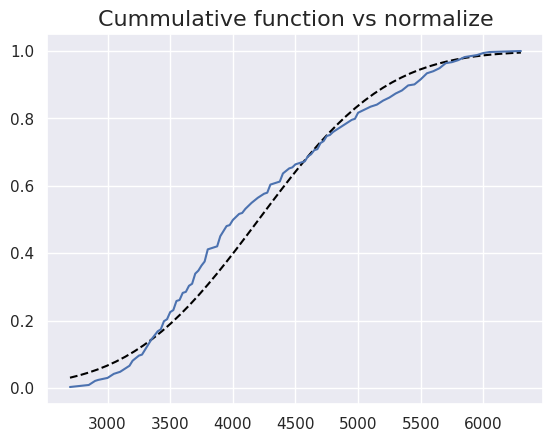

In [65]:
xs = np.linspace(stats['min'],stats['max'])
ys= scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)

plt.plot(xs,ys,color='black',linestyle='dashed')
empiricaldist.Cdf.from_seq(
    df.body_mass_g,
    normalize=True
).plot()
plt.title('Cummulative function vs normalize',fontsize=Title_fontsize)
plt.show()


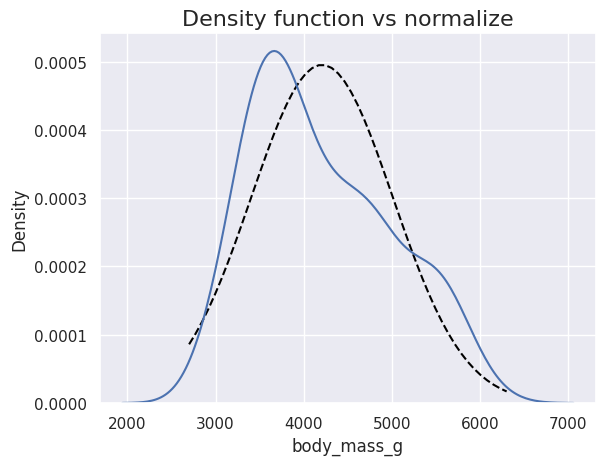

In [67]:
xs = np.linspace(stats['min'],stats['max'])
ys= scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)

plt.plot(xs,ys,color='black',linestyle='dashed')

sns.kdeplot(
    data=df,
    x='body_mass_g'
)

plt.title('Density function vs normalize',fontsize=Title_fontsize)
plt.show()

In [68]:
# Filtros

adelie_df = df.query("species == 'Adelie'")
gentoo_df = df.query("species == 'Gentoo'")
chinstrap_df = df.query("species == 'Chinstrap'")

specie = [adelie_df,gentoo_df,chinstrap_df]
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_columns = numeric_columns.drop('year')


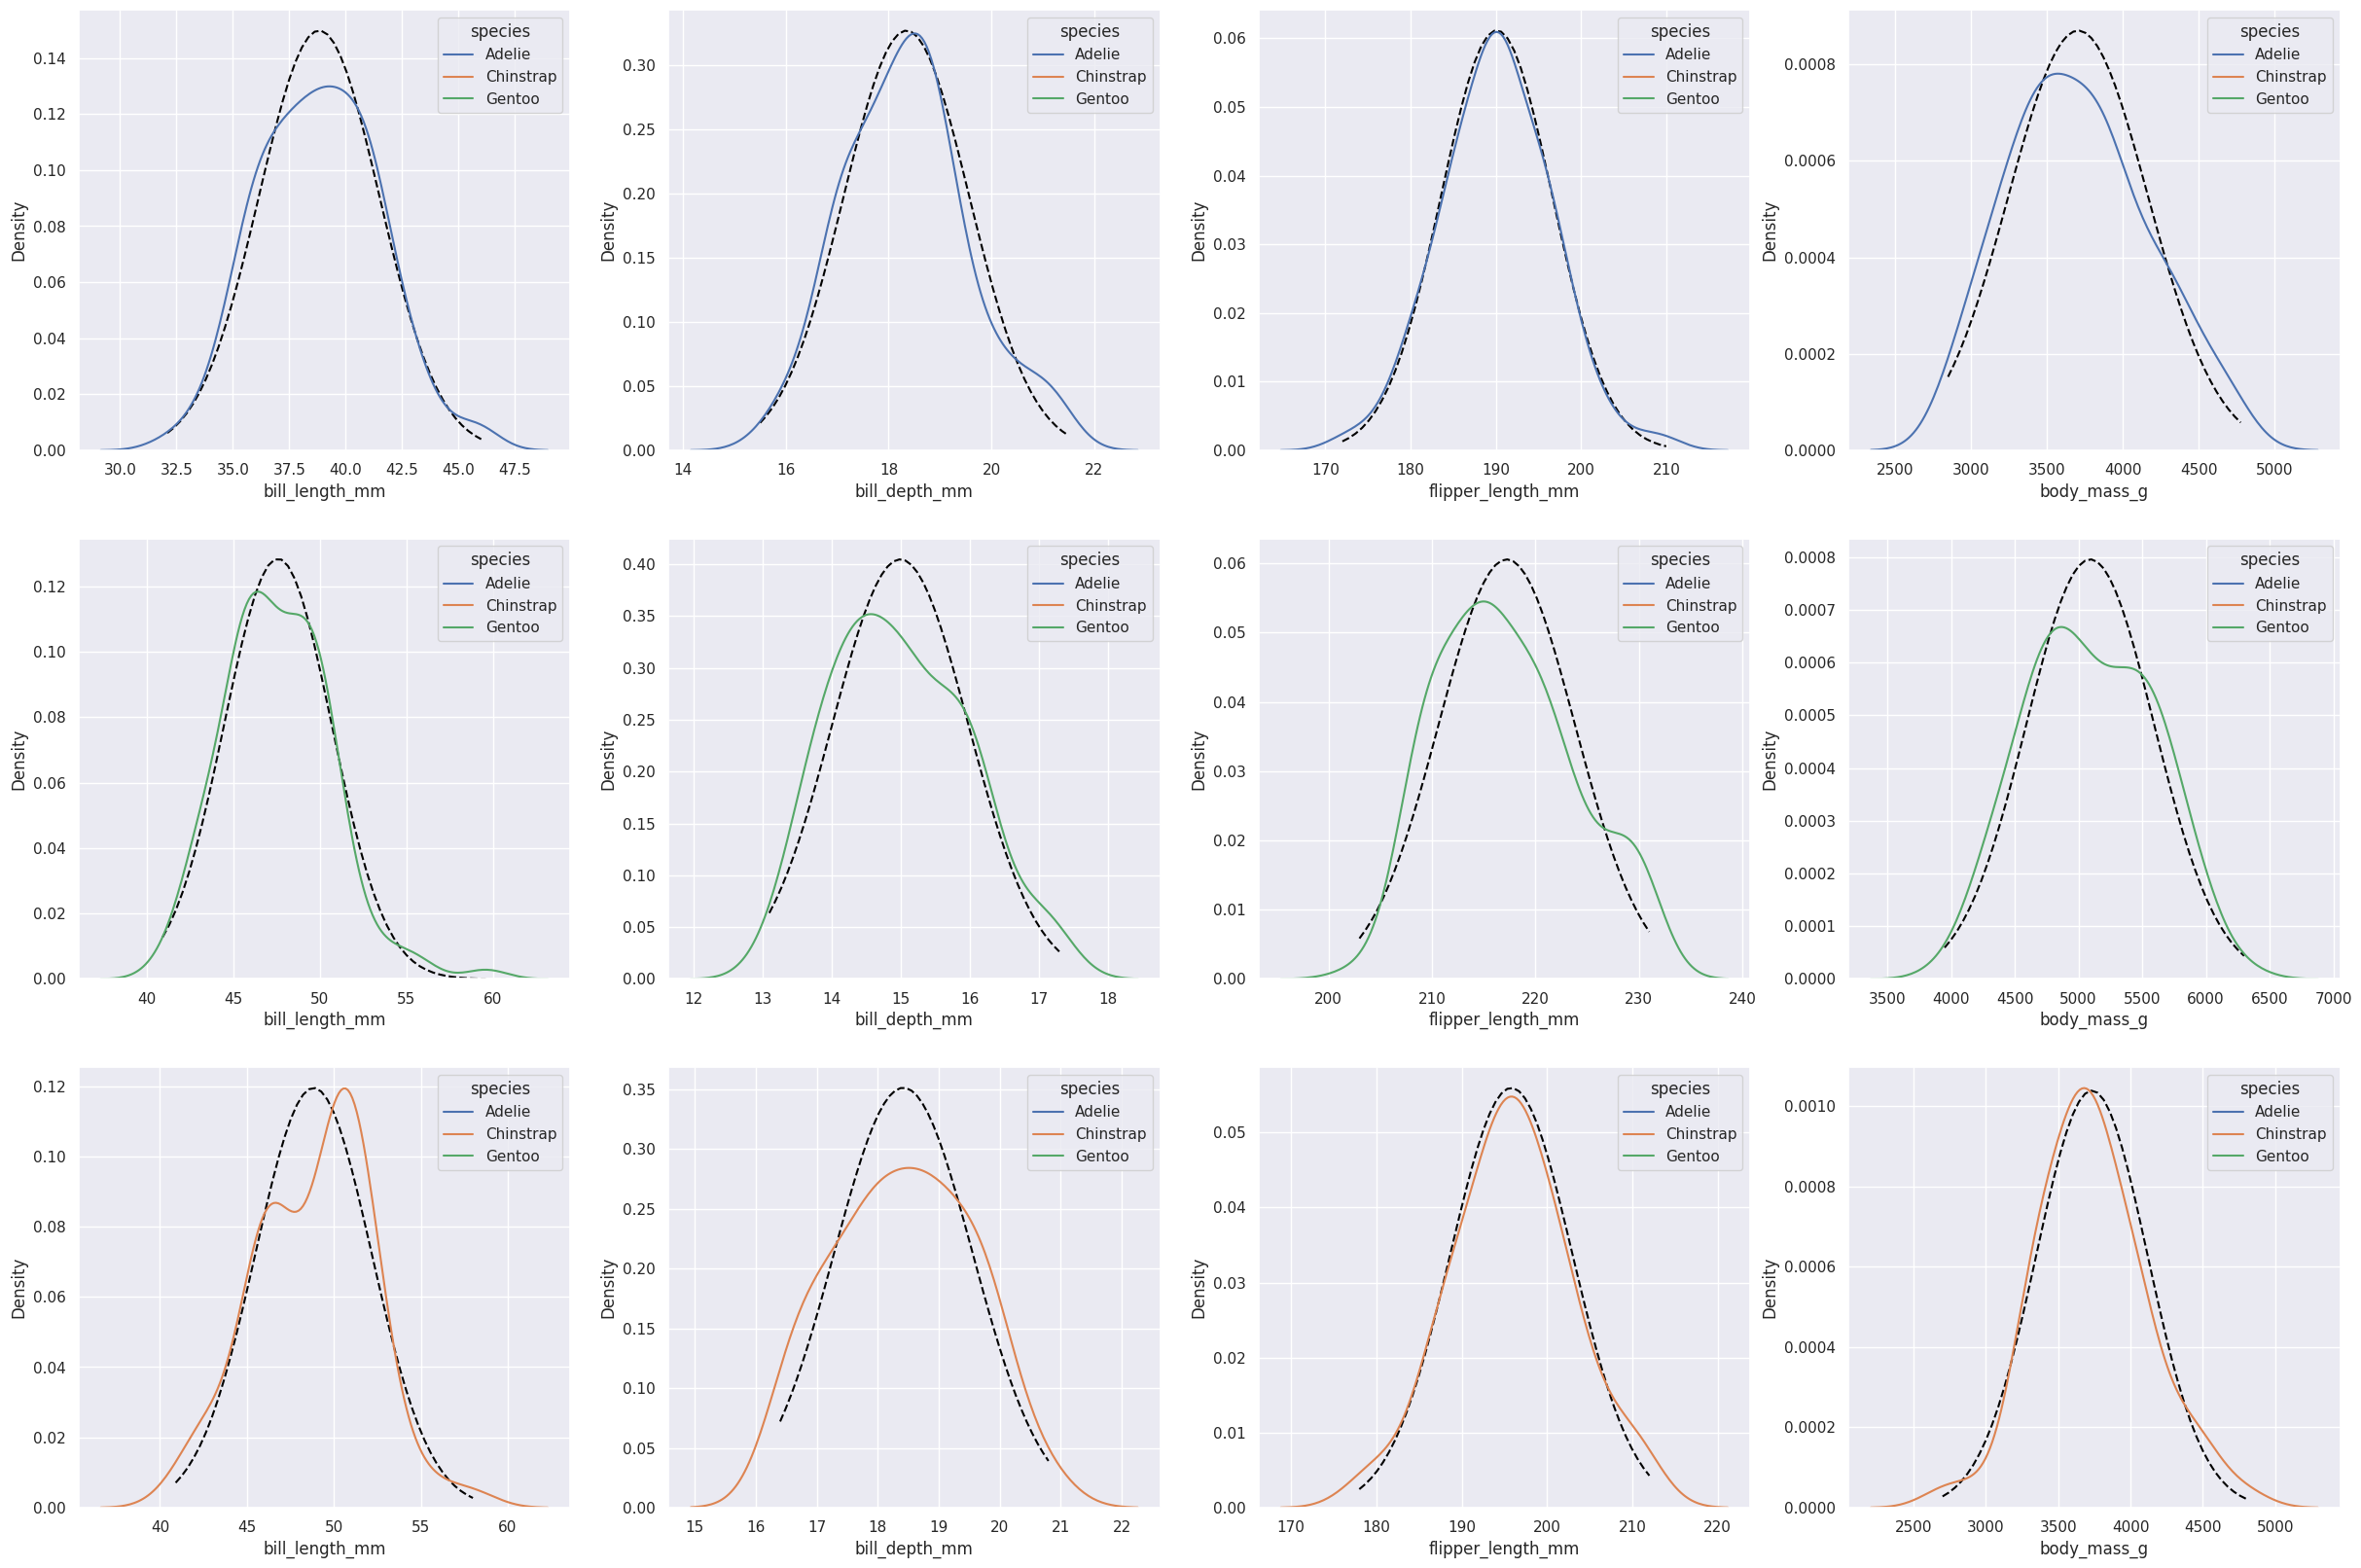

In [74]:
# Grafica

fig, ax = plt.subplots(3,4,figsize=(30,20))
for i, i_col in enumerate(specie):
    for j, j_col in enumerate(numeric_columns):
        stats = i_col[j_col].describe()

        xs = np.linspace(stats['min'],stats['max']) 
        ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

        ax[i][j].plot(xs,ys, color='black',linestyle='--')

        sns.kdeplot(
            ax = ax[i][j],
            data = i_col,
            x=j_col,
            hue='species'
        ) 

In [85]:
df.sex.value_counts(normalize=True)

male     0.50
female   0.50
Name: sex, dtype: float64

# Bivariate analysis

## Relationship between variables

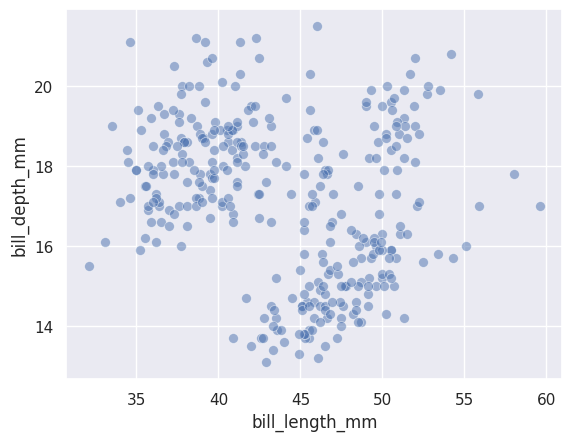

In [129]:
sns.scatterplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=50
    )
plt.show()

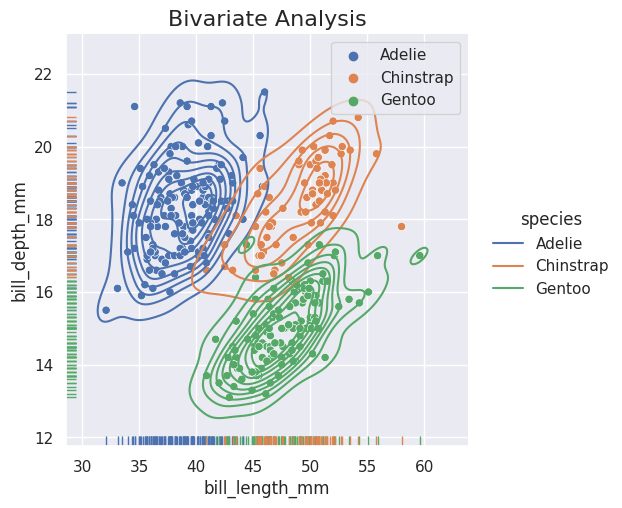

In [124]:
ax = sns.displot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde',
    hue='species'
)

ax=sns.scatterplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1,
    hue='species'
    )
plt.title('Bivariate Analysis',fontsize=Title_fontsize)
plt.legend()
plt.show()

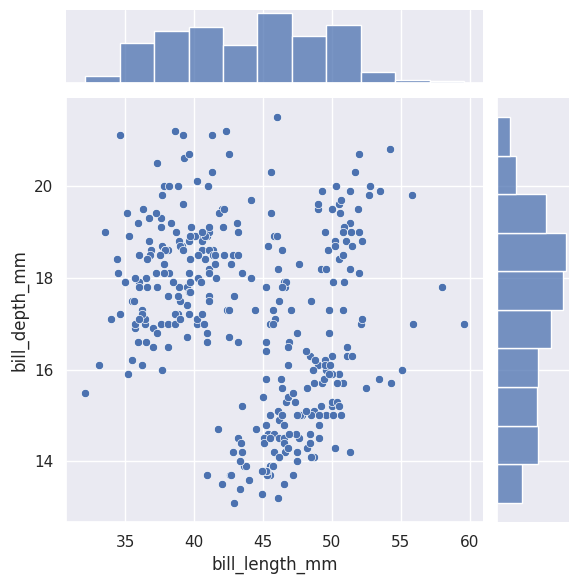

In [112]:
sns.jointplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm'
)
plt.show()


## Relationship between variables: categorical vs numeric

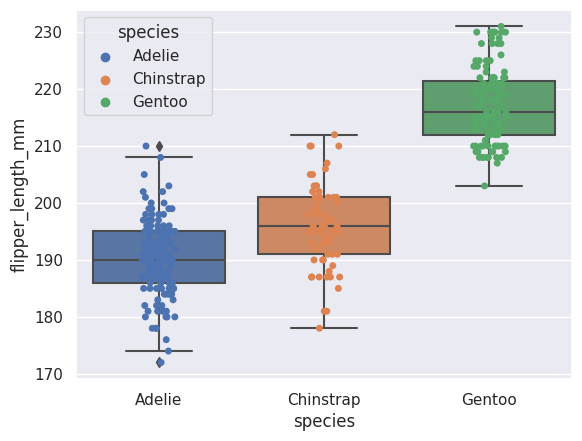

In [119]:
ax = sns.boxplot(
    data=df,
    y='flipper_length_mm',
    x='species'
)

ax =  sns.stripplot(
    data=df,
    y='flipper_length_mm',
    x='species',
    hue='species'
)

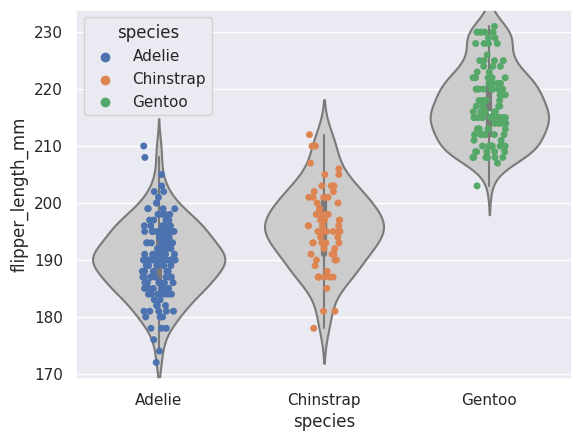

In [131]:
ax = sns.violinplot(
    data=df,
    y='flipper_length_mm',
    x='species',
    color='0.8'
)

ax =  sns.stripplot(
    data=df,
    y='flipper_length_mm',
    x='species',
    hue='species'
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

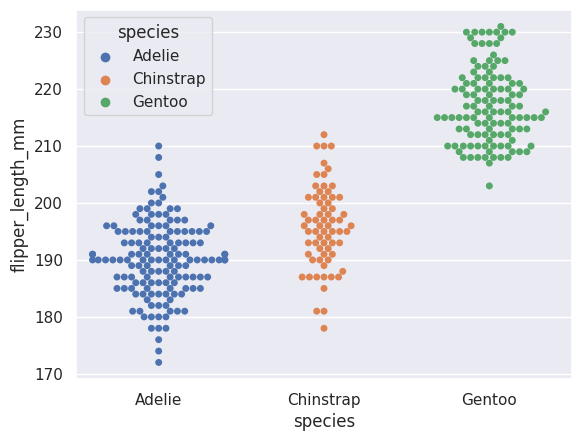

In [134]:
sns.swarmplot(
    data=df,
    x='species',
    y='flipper_length_mm',
    hue= 'species'
)

## Realtionship bwtewwn variables: Correlation

<AxesSubplot: xlabel='flipper_length_mm', ylabel='body_mass_g'>

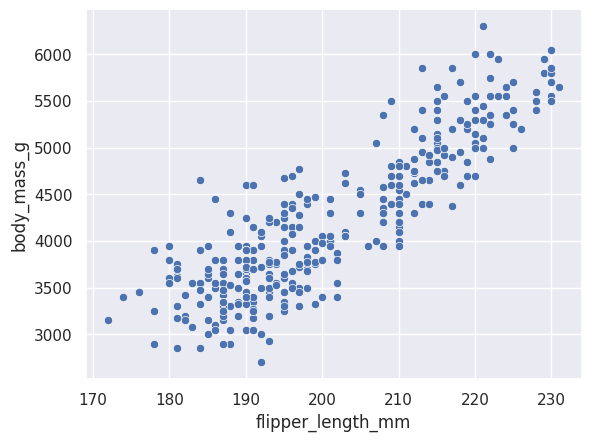

In [140]:
sns.scatterplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g'
)

### Coeficiente de Correlación de Pearson:
 Cuantifica la intensidad de la realción lineal entre 2 varaibles en un análisis de correlación.
 
 
 Imp: Correlación no implica causalidad!!!

In [143]:
df.corr().style.highlight_between(left=0.65, right=.99,color='green')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


<AxesSubplot: >

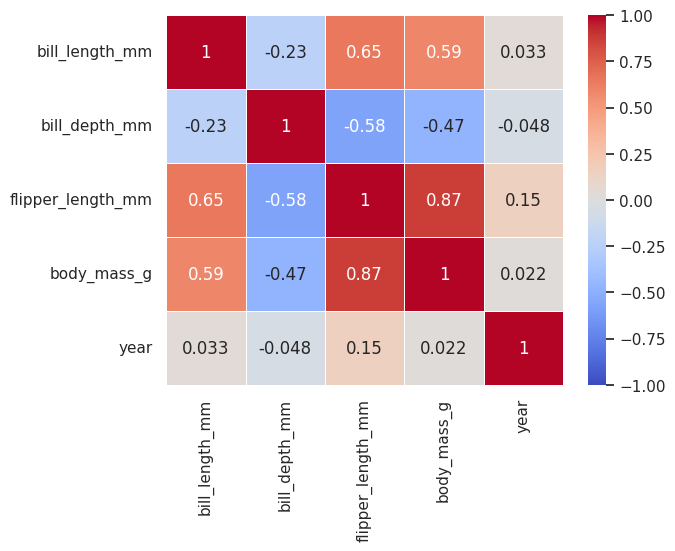

In [161]:
sns.heatmap(
    data=df.corr(),
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

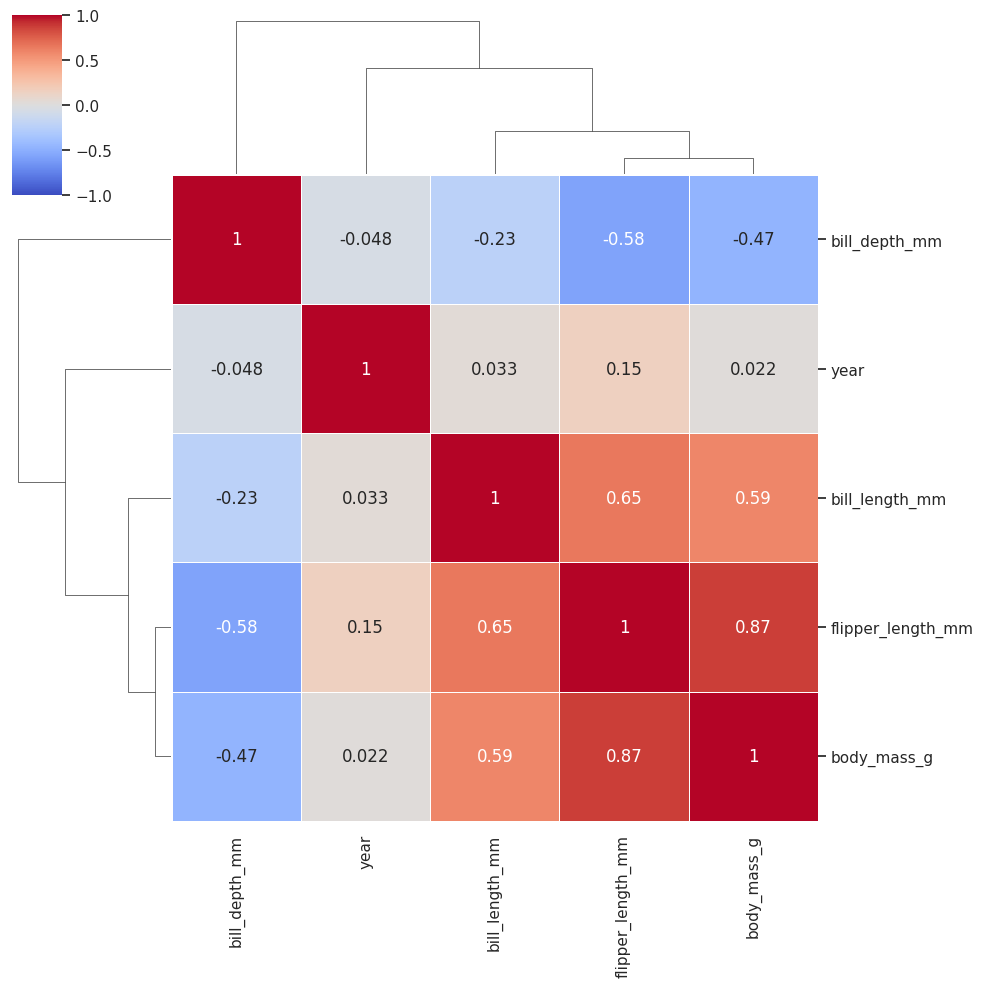

In [160]:
sns.clustermap(
    data=df.corr(),
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

In [163]:
df_num_sex=(
    df.
    assign(
        numeric_sex=lambda df:df.sex.replace(['female','male'],[0,1])
    )

)

In [168]:
df_num_sex['numeric_sex']=df_num_sex['numeric_sex'].astype('int')

<AxesSubplot: >

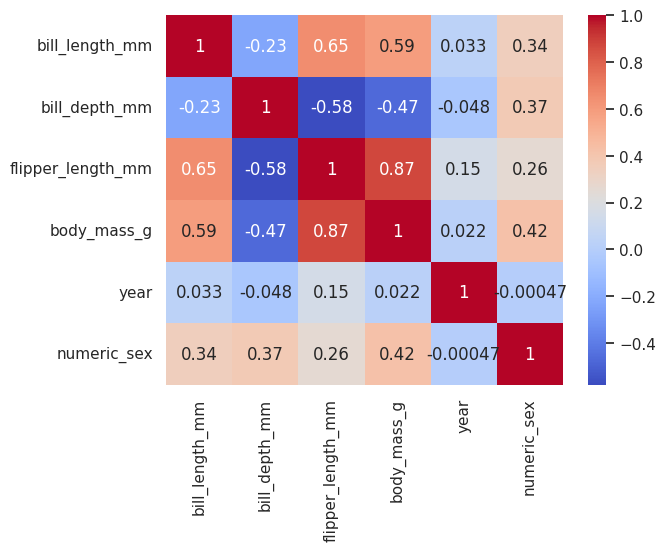

In [169]:
sns.heatmap(
    df_num_sex.corr(),
    annot= True,
    cmap='coolwarm'
)

## Regresión Simple
Para establecer la fuerza de la correlación

In [178]:
reg1=scipy.stats.linregress(
    x=df.bill_length_mm,
    y=df.bill_depth_mm
)
reg2=scipy.stats.linregress(
    x=df.flipper_length_mm,
    y=df.body_mass_g
)
print(reg1,reg2,sep='\n')


LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=50.153265942241134, intercept=-5872.092682842826, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=1.540230983824635, intercept_stderr=310.2851553513499)


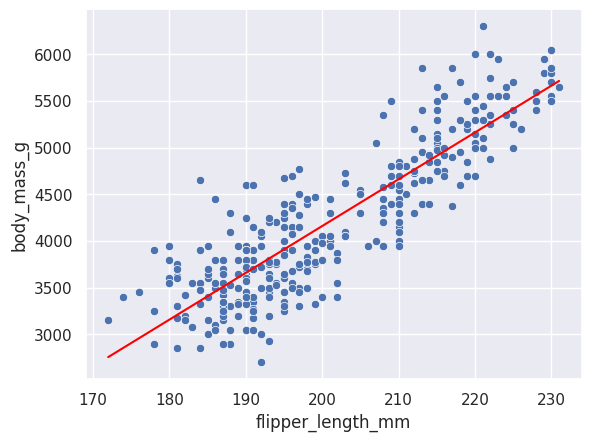

In [181]:
sns.scatterplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g'
)

fx2=np.array([df['flipper_length_mm'].min(),df['flipper_length_mm'].max()])
fy2= reg2.intercept + reg2.slope * fx2
plt.plot(fx2,fy2,color='red')
plt.show()

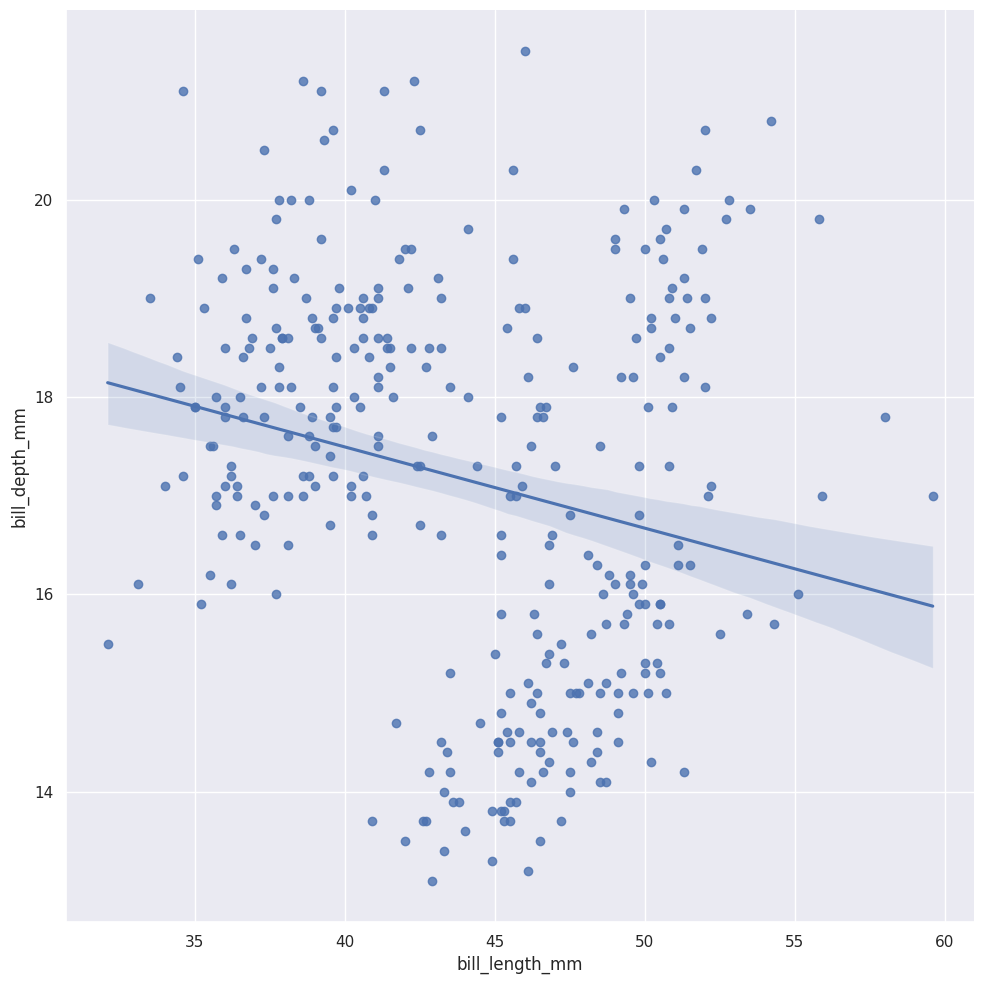

In [171]:
sns.lmplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

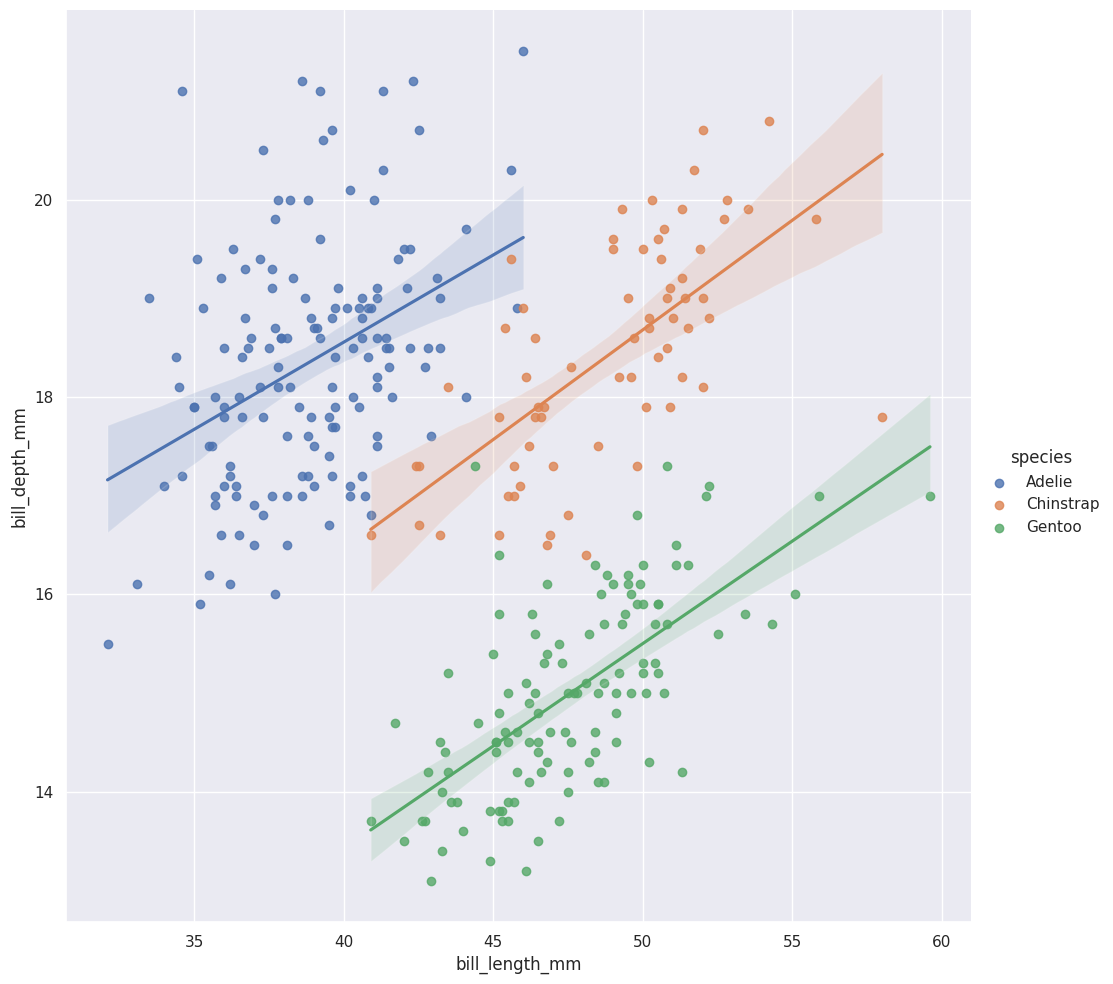

In [173]:
sns.lmplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)